In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# Load the datasets using the given file paths
zip_sea = pd.read_csv('inputs/zip_sea.csv')
zip_sea_new = pd.read_csv('inputs/zip_sea_new.csv')

# Replace missing values with NaN
zip_sea['Price'] = pd.to_numeric(zip_sea['Price'], errors='coerce')
zip_sea_new['Price'] = pd.to_numeric(zip_sea_new['Price'], errors='coerce')

# Create the model formula
formula = 'Price ~ GMSL_noGIA * Q("Inland/Coastal") + C(Pair)'

# Create and fit the model using the training set (zip_sea.csv)
model = smf.ols(formula, data=zip_sea).fit()

# Evaluate the model using the testing set (zip_sea_new.csv) and calculate the R-squared score
zip_sea_new['PredPrice'] = model.predict(zip_sea_new)

# Save the predictions to a file called predict.csv in the outputs folder
zip_sea_new.to_csv('outputs/predict.csv', index=False)

# Output the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     824.4
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        23:05:53   Log-Likelihood:                -63939.
No. Observations:                4739   AIC:                         1.280e+05
Df Residuals:                    4698   BIC:                         1.282e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# Load the datasets using the given file paths
zip_sea = pd.read_csv('inputs/zip_sea.csv')
zip_sea_new = pd.read_csv('inputs/zip_sea_new.csv')

# Replace missing values with NaN
zip_sea['LogPrice'] = np.log(zip_sea['Price'])
zip_sea['LogPrice'] = zip_sea['LogPrice'].replace([np.inf, -np.inf], np.nan)
zip_sea_new['LogPrice'] = np.log(zip_sea_new['Price'])
zip_sea_new['LogPrice'] = zip_sea_new['LogPrice'].replace([np.inf, -np.inf], np.nan)

# Create the model formula
formula = 'LogPrice ~ GMSL_noGIA * Q("Inland/Coastal") + C(Pair)'

# Create and fit the model using the training set (zip_sea.csv)
model = smf.ols(formula, data=zip_sea).fit()

# Evaluate the model using the testing set (zip_sea_new.csv) and calculate the R-squared score
zip_sea_new['PredLogPrice'] = model.predict(zip_sea_new)

# Save the predictions to a file called predict.csv in the outputs folder
zip_sea_new.to_csv('outputs/predict2.csv', index=False)

# Output the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        23:05:53   Log-Likelihood:                 913.99
No. Observations:                4739   AIC:                            -1746.
Df Residuals:                    4698   BIC:                            -1481.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [3]:
import csv

# Read data from predict.csv
with open('outputs/predict.csv', 'r') as csvfile1:
    csvreader1 = csv.reader(csvfile1)
    predict_data = [row for row in csvreader1]

# Read data from predict2.csv
with open('outputs/predict2.csv', 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2)
    predict2_data = [row for row in csvreader2]

# Combine the last column of predict2.csv into predict.csv
for i in range(len(predict_data)):
    if i == 0:
        predict_data[i].extend(["PredLogPrice"])
    else:
        predict_data[i].append(predict2_data[i][-1])

# Write the combined data to a new CSV file
with open('outputs/combined_predict.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(predict_data)

print("Combined data saved to 'combined_predict.csv'")

Combined data saved to 'combined_predict.csv'


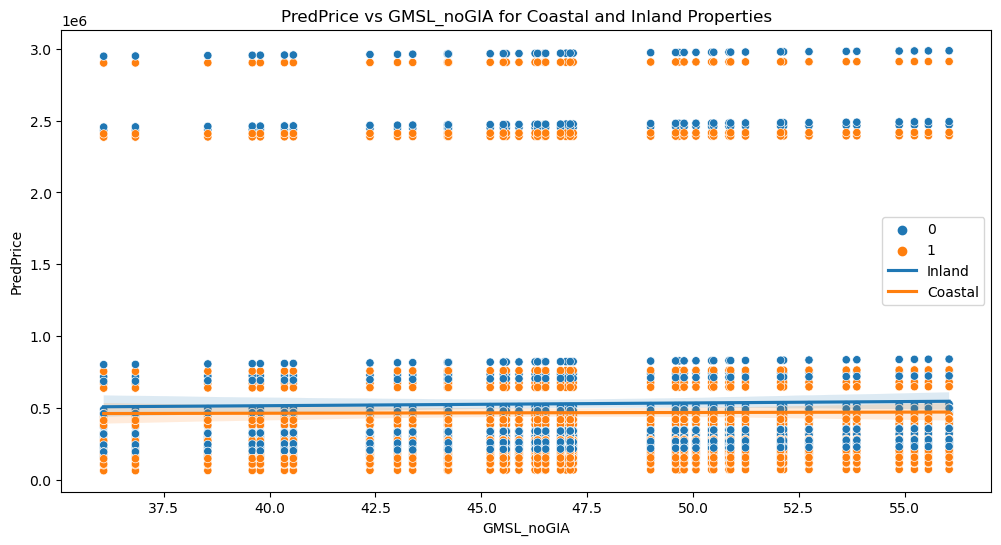

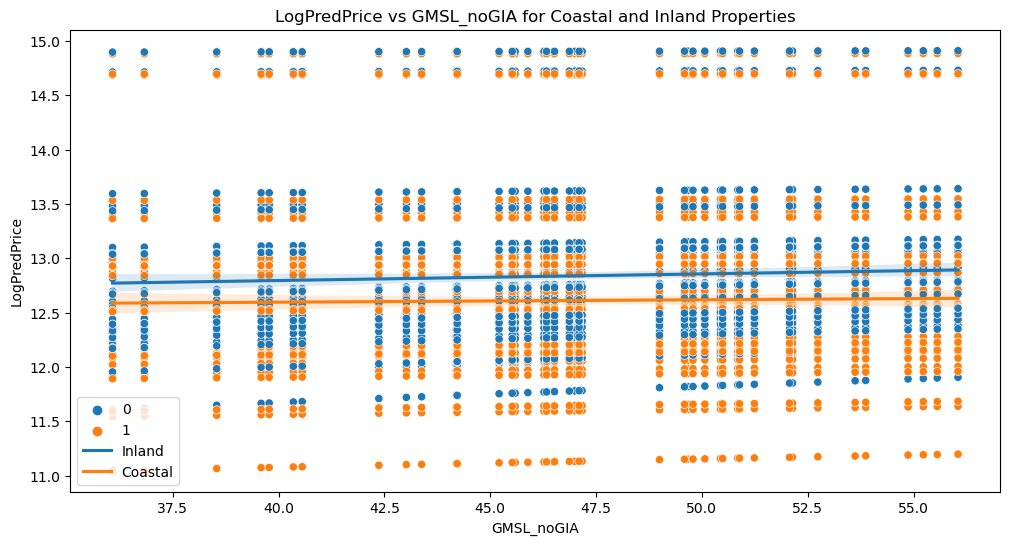

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined_data.csv file
combined_data = pd.read_csv("outputs/combined_predict.csv")


combined_data['LogPredPrice'] = np.log(combined_data['PredPrice'])

# Scatterplot with PredPrice
plt.figure(figsize=(12, 6))
sns.scatterplot(x="GMSL_noGIA", y="PredPrice", hue="Inland/Coastal", data=combined_data)
plt.title("PredPrice vs GMSL_noGIA for Coastal and Inland Properties")

# Add linear regression lines
coastal_data = combined_data[combined_data["Inland/Coastal"] == 1]
inland_data = combined_data[combined_data["Inland/Coastal"] == 0]

sns.regplot(x="GMSL_noGIA", y="PredPrice", data=inland_data, scatter=False, label="Inland")
sns.regplot(x="GMSL_noGIA", y="PredPrice", data=coastal_data, scatter=False, label="Coastal")

plt.legend()
plt.savefig('graphs/predprice_vs_GMSL_noGIA_coastal_inland.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatterplot with LogPredPrice
plt.figure(figsize=(12, 6))
sns.scatterplot(x="GMSL_noGIA", y="LogPredPrice", hue="Inland/Coastal", data=combined_data)
plt.title("LogPredPrice vs GMSL_noGIA for Coastal and Inland Properties")

# Add linear regression lines
sns.regplot(x="GMSL_noGIA", y="LogPredPrice", data=inland_data, scatter=False, label="Inland")
sns.regplot(x="GMSL_noGIA", y="LogPredPrice", data=coastal_data, scatter=False, label="Coastal")

plt.legend()
plt.savefig('graphs/logpredprice_vs_GMSL_noGIA_coastal_inland.png', dpi=300, bbox_inches='tight')
plt.show()